In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import networkx as nx

In [15]:
with open('../Data/2023_nodes_header.csv', 'r') as file:
    columns = file.readline().strip().split(',') 
df_nodes = pd.read_csv('../Data/2023_nodes.csv', header=None)
df_nodes.columns = columns
df_nodes

,stationId:ID,name,latitude:float,longitude:float,:LABEL
0,0,Métro Mont-Royal (Utilités publiques / Rivard),45.524236,-73.581552,Station
1,1,Rielle / Wellington,45.460156,-73.567001,Station
2,2,Ste-Catherine / Drummond,45.498588,-73.574278,Station
3,3,Boyer / du Mont-Royal,45.527432,-73.579917,Station
4,4,Clark / Ontario,45.510625,-73.566903,Station
...,...,...,...,...,...
935,2210657,Gilford / Drolet,45.523970,-73.585075,Station
936,4868044,Parc Père-Marquette ( de Bellechasse / de Lana...,45.539354,-73.595374,Station
937,4970813,Saint-Sylvestre / Labonté,45.535426,-73.513659,Station
938,11279502,Jardin Botanique (Sherbrooke / Pie-IX),45.556792,-73.554647,Station


In [16]:
with open('../Data/2023_edges_header.csv', 'r') as file:
    columns = file.readline().strip().split(',') 
df_edges = pd.read_csv('../Data/2023_edges.csv', header=None)
df_edges.columns = columns
df_edges

,:START_ID,starttimems:int,endtimems:int,:END_ID,start_date:DATETIME,:TYPE
0,0,1698266696468,1698267092113,509,2023-10-25T20:44:56.468000,CYCLES_TO
1,1,1698270535502,1698271967951,301,2023-10-25T21:48:55.502000,CYCLES_TO
2,2,1698285705974,1698285992418,471,2023-10-26T02:01:45.974000,CYCLES_TO
3,3,1698269489932,1698269814383,424,2023-10-25T21:31:29.932000,CYCLES_TO
4,4,1698270006571,1698270440298,1641,2023-10-25T21:40:06.571000,CYCLES_TO
...,...,...,...,...,...,...
11730057,412,1685820631664,1685823750407,532,2023-06-03T19:30:31.664000,CYCLES_TO
11730058,492,1685820631467,1685821009127,3346,2023-06-03T19:30:31.467000,CYCLES_TO
11730059,910,1685820628918,1685822020021,311,2023-06-03T19:30:28.918000,CYCLES_TO
11730060,1268,1685820635166,1685822157916,1789,2023-06-03T19:30:35.166000,CYCLES_TO


In [25]:
G = nx.Graph()

# Iterate over dataframe rows and add nodes to the graph
for index, row in df_nodes.iterrows():
    station_id = row['stationId:ID']
    name = row['name']
    if name == "Smith / Peel": # the coordinate of Smith / Peel is -1/-1 ...
        latitude = 45.500414
        longitude = -73.57371
    else:
        latitude = row['latitude:float']
        longitude = row['longitude:float']
    
    # Add node to the graph with attributes
    G.add_node(station_id, name=name, latitude=latitude, longitude=longitude)

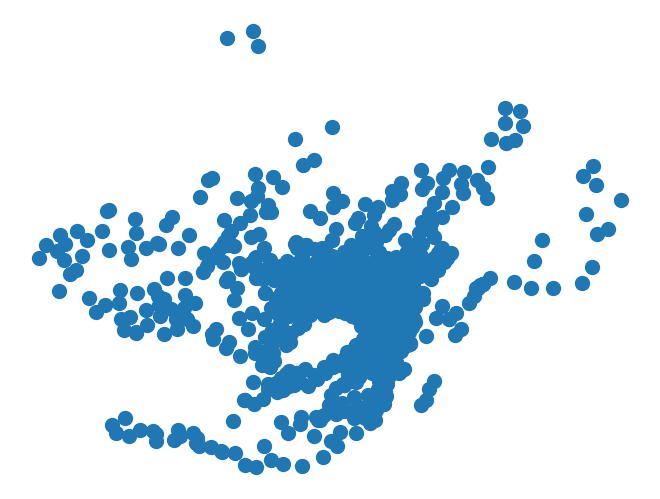

In [29]:
pos = {node: (data['longitude'], data['latitude']) for node, data in G.nodes(data=True)}

# Draw nodes with labels
nx.draw(G, pos, with_labels=False, labels={node: data['name'] for node, data in G.nodes(data=True)}, node_size=100)

# Show plot
plt.show()

In [ ]:
graphs_by_month = {}

# Iterate over dataframe rows
for index, row in df_edges.iterrows():
    start_date = pd.to_datetime(row['start_date:DATETIME'])
    month = start_date.month
    
    # Check if a graph for this month already exists, if not, create it
    if month not in graphs_by_month:
        graphs_by_month[month] = G
    
    # Add edge to the corresponding graph for this month
    G_month = graphs_by_month[month]
    start_id = row[':START_ID']
    end_id = row[':END_ID']
    start_time = row['starttimems:int']
    end_time = row['endtimems:int']
    
    # Add edge with attributes
    G_month.add_edge(start_id, end_id, starttimems=start_time, endtimems=end_time, start_date=start_date)


In [ ]:
num_months = len(graphs_by_month)
num_rows = (num_months // 2) + (num_months % 2)  # Calculate number of rows needed
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))  # Adjust figsize as needed

# Iterate over the graphs for each month
for idx, (month, G_month) in enumerate(graphs_by_month.items()):
    row_idx = idx // 2
    col_idx = idx % 2
    ax = axes[row_idx, col_idx]
    
    # Draw nodes
    pos = {node: (data['longitude'], data['latitude']) for node, data in G_month.nodes(data=True)}
    
    # Draw nodes with labels
    nx.draw(G_month, pos, ax=ax, with_labels=False, node_size=100)
    
    # Set title for the subplot
    ax.set_title(f"Graph for Month {month}")

# Show plot
plt.tight_layout()
plt.show()